# Heart Disease Prediction Using Logistic Regression
Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic regression is a statistical algorithm which analyze the relationship between two data factors.

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

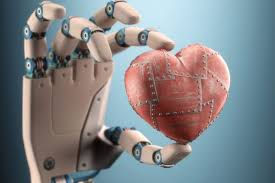

## Dataset description
male: erkek

age: yaş

education: eğitim

currentSmoker: mevcut sigara içici

cigsPerDay:	günde içilen sigara sayısı

BPMeds:	BP ilaçları

prevalentStroke:	mevcut inme

prevalentHyp:	mevcut hipertansiyon

diabetes:	diyabet

totChol:	toplam kolesterol

sysBP:	sistolik kan basıncı

diaBP:	diastolik kan basıncı

BMI:	vücut kitle indeksi

heartRate:	kalp atış hızı

glucose:	glukoz

TenYearCHD:	On Yıllık Kalp Hastalığı Riski

## Import Libraries

In [19]:
import pandas as pd  # For data processing and DataFrame structure
import numpy as np  # For numerical operations and working with arrays

import matplotlib.pyplot as plt  # Data visualization library
from matplotlib import rcParams
import seaborn as sns  # Statistical data visualization
import pylab as pl  # A subset of Matplotlib, for plotting
import matplotlib.mlab as mlab  # Deprecated module of Matplotlib (visualization)

import statsmodels.api as sm  # For statistical modeling and hypothesis testing
import scipy.optimize as opt  # For optimization algorithms

from sklearn import preprocessing  # For data scaling and preprocessing
from sklearn.model_selection import train_test_split # Split train test 
from sklearn.linear_model import LogisticRegression # Logistic Regression model

## Load Dataset

In [2]:
ls

LogisticRegression_HeartDiseasePrediction.ipynb
framingham.csv


In [3]:
disease_df = pd.read_csv("framingham.csv")
disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
disease_df.shape

(4240, 16)

In [5]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## EDA - Exploratory Data Analysis

In [7]:
disease_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [25]:
print(disease_df.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [26]:
disease_df = disease_df.dropna()

In [27]:
print(disease_df.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [9]:
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3101
1     557
Name: count, dtype: int64


In [6]:
# Veri setinde mevcut tüm hastaların On Yıllık CHD Kaydı:
disease_df['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

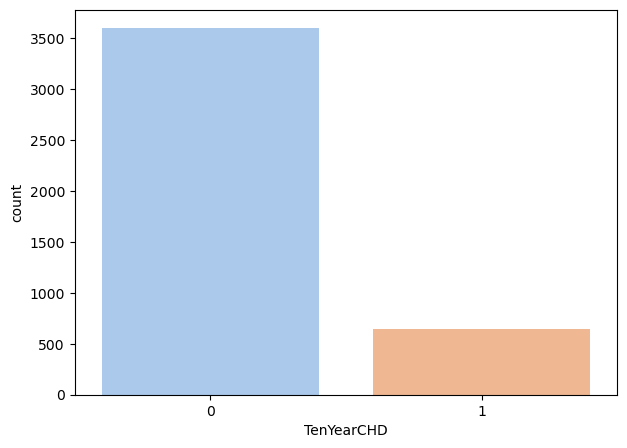

In [7]:
# Ten Year’s CHD Record of all the patients available in the dataset:
plt.figure(figsize=(7,5))
sns.countplot(x='TenYearCHD',data=disease_df,
             palette = "pastel")
plt.show()

## Splitting the Dataset

In [29]:
X = np.asarray(disease_df[['age', 'male', 'cigsPerDay', 
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

In [30]:
# Data Normalization
X = preprocessing.StandardScaler().fit(X).transform(X)

In [31]:
# Train-and-Test -Split
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2560, 6) (2560,)
Test set: (1098, 6) (1098,)


In [32]:
print(X_train.shape)
print(y_train.shape)
print(y_train.dtype)

(2560, 6)
(2560,)
int64


In [33]:
# Fitting Logistic Regression Model for Heart Disease Prediction
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

## Evaluating Model

In [34]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.843351548269581


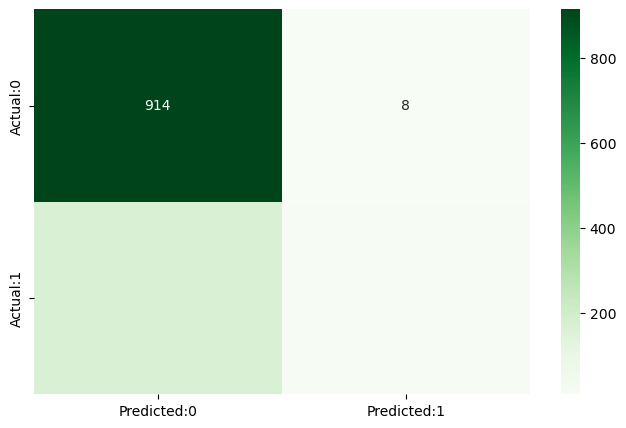

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       922
           1       0.60      0.07      0.12       176

    accuracy                           0.84      1098
   macro avg       0.72      0.53      0.52      1098
weighted avg       0.81      0.84      0.79      1098



In [35]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))